**Abdullah Shahzad**

Spring 2023

CS 252: Mathematical Data Analysis and Visualization

Project 5: Clustering

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

Text(0.5, 1.0, 'super_simple scatterplot')

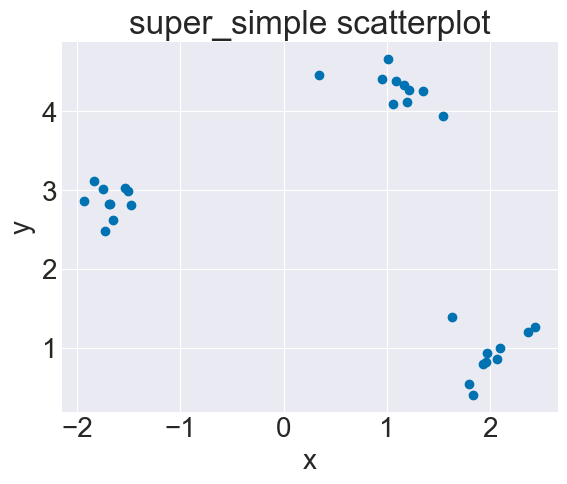

In [3]:
super_simple = pd.read_csv('data/super_simple.csv')
super_simple = super_simple.to_numpy()

plt.scatter(super_simple[:, 0], super_simple[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("super_simple scatterplot")

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [4]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [5]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [6]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [7]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [8]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [9]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids` (1/2)

In [10]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]
''')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]

You should see:
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]



#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [11]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.
There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.
----------------------------------------------------------------------------------------------------
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [-1.6855   2.8272 ]
 [ 2.00717  0.9184 ]
 [ 1.1924   4.1182 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [-3.4786   2.2845 ]
 [ 1.45836  0.20321]
 [ 0.58964  3.57332]]


You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ 1.09087  4.29295]
    [-1.68133  2.85917]
    [some_float  some_float ]
    [ 2.00717  0.9184 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ 0.75287 -0.17425]
    [ 0.15877 -0.25313]
    [some_float  some_float ]
    [some_float  some_float]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [12]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot showing the cluster assignments of the data in different colors. Nearby samples in your scatterplot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Here is an example:

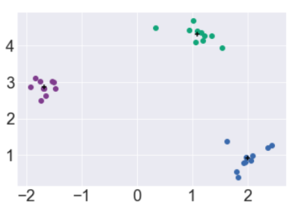

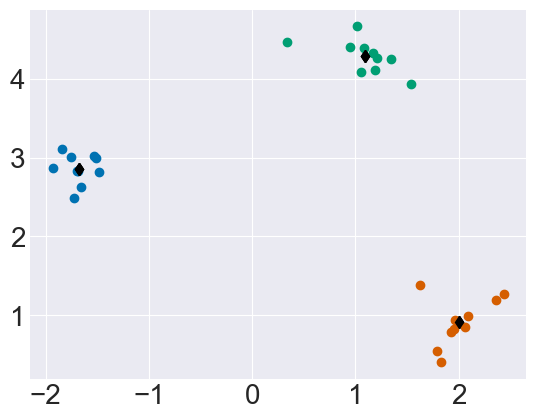

In [13]:
np.random.seed(0)
cluster.cluster(3)
cluster.plot_clusters()
plt.show()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

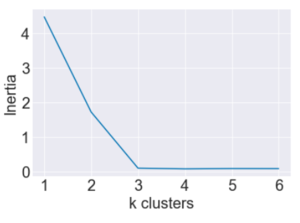

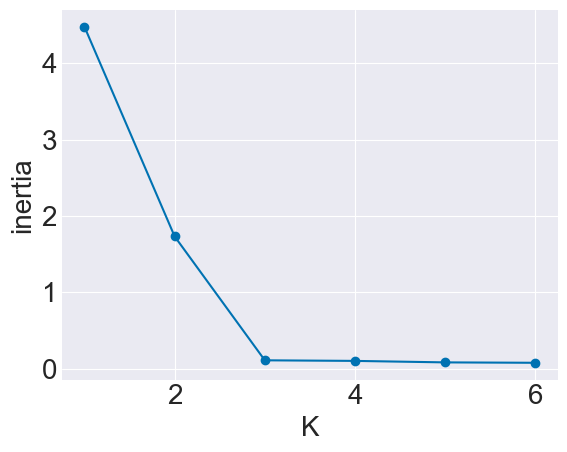

In [14]:
np.random.seed(2) 
cluster.elbow_plot(6)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer 1:** There are 3 clusters in the super_simple data. This is because when k=3, the inertia is really low and after that point, increasing the value of k does not further decrease it.

#### 1d) Clustering the `five_blobs` dataset

Load in the `five_blobs` dataset then in the cell below:
- create a scatterplot showing the 2D dataset (without any clustering).
- run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatterplot).
- create a scatterplot showing the clustered data.

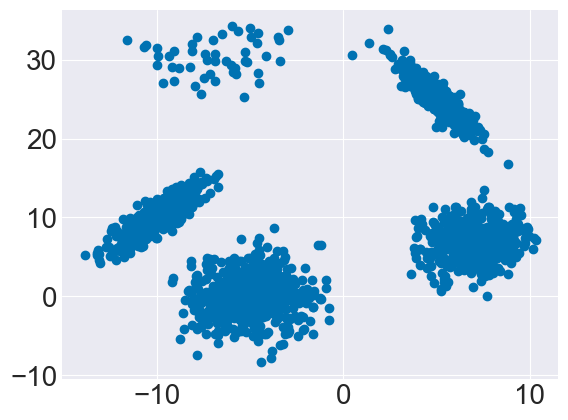

In [15]:
five_blobs = pd.read_csv('data/five_blobs.csv')
five_blobs = five_blobs.to_numpy()
plt.scatter(five_blobs[:, 0], five_blobs[:, 1])

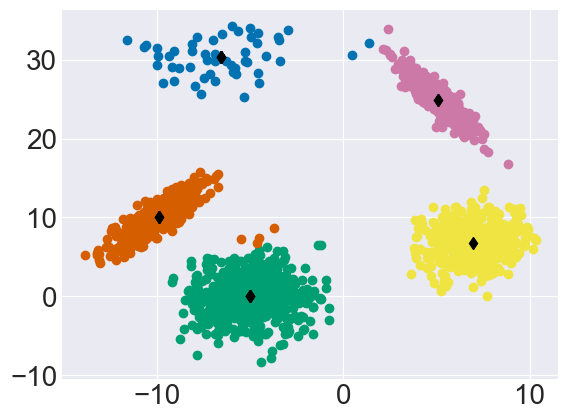

In [16]:

# place me before you cluster the dataset
np.random.seed(0)

cluster = kmeans.KMeans(five_blobs)
cluster.cluster(k=5)
cluster.plot_clusters()


#### Questions

**Question 2:** Run K-means and make the above scatterplot showing the clusters at least 5 times, changing the random seed value each time (e.g. with `np.random.seed(0)`, `np.random.seed(1)`, etc.). What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**

**Question 3:** Have your code in above the cell also generate an elbow plot with `k` running from 1 to 10. As you change the random seed, how predictive is the elbow plot of the number of clusters in the dataset? In order words, if you had to only rely on the elbow plot to determine the number of clusters (without looking at the scatterplot), how often would you be correct? **Explain your reasoning.**

**Answer 2:** It happens because of the way we initialize the centroids. We randomly choose the initial centroids, so when we change the seed, the choice of the initial centroids change, which changes the points in the clusters, which changes the centroids in the next step, et cetera.


**Answer 3:** As I kept changing the seed, the elbow plots changed as expected. If I were to use the elbow plot to make a prediction, I would choose 3 or 4 almost all the time. The two clusters at the top almost always end up in the same cluster. Since I believe those two are different clusters, I would be wrong nearly the whole time, but only by 1 or 2 which should not be a huge deal.

#### Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for every $k$ value and make a new scatterplot of the cluster assignments.

In [17]:
# place me before you batch cluster the dataset
np.random.seed(0)
for i in range(1,10):
    cluster = kmeans.KMeans(five_blobs)
    cluster.cluster_batch(k=i, n_iter=10)
    print(f'Lowest inertia for {i} clusters is {cluster.compute_inertia()}')

Lowest inertia for 1 clusters is 145.36660394477195
Lowest inertia for 2 clusters is 60.58757217336966
Lowest inertia for 3 clusters is 26.296211612347438
Lowest inertia for 4 clusters is 10.85242740553864
Lowest inertia for 5 clusters is 7.116345982439034
Lowest inertia for 6 clusters is 6.0603733230577275
Lowest inertia for 7 clusters is 5.161059237249681
Lowest inertia for 8 clusters is 4.444702735372976
Lowest inertia for 9 clusters is 3.54907533741863


**Question 4:** In way ways (if any) did the clustering improve? **Why?**

**Answer 4:** The inertias for each k went down by one by one . It is not a huge difference, but it consistently decreased, especially for smaller values of k. This is because instead of performing k-means once, we perform it multiple times and take the min. The centroids are initialized randomly for each instance of k-means. Therefore, by performing a few of them and taking their minimum, we reduce the chance of the final centroids being unfortunately assigned sub-optimal locations.

### 1e) Update elbow plot for the `five_blobs` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

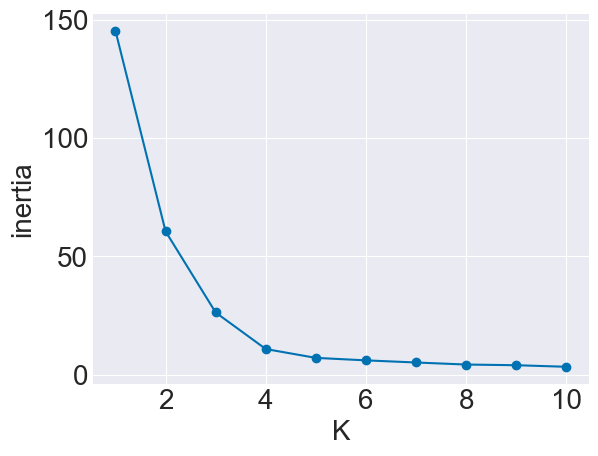

In [18]:
cluster = kmeans.KMeans(five_blobs)
cluster.elbow_plot(max_k=10, n_iter=10)

**Question 5:** How predictive is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** Now that we are using batch_cluster, the inertias are lower, especially for earlier k. The elbow plot now suggests that we chose even lower values of k. Instead of 3s and 4s like last time, almost all elbow plots suggests k=3 after using batch_cluster. However, I still think there are 5 different clusters in data and neither of the elbow plots really suggest 5.

## Task 2: Improved initialization and cluster detection

Here, we will explore more sophisticated techniques for initializing K-means and determining the number of clusters in a dataset. 

### 2a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED (i.e. what's the closest distance of each point to centroids that are currently defined). For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

- Update `cluster` to take in an keyword argument `init_method='random'`. If the user selects 'random', run the old method. If the user selects 'kmeans++', run the K-means++ initialization.
- Create a scatterplot below with K-means++ initialization

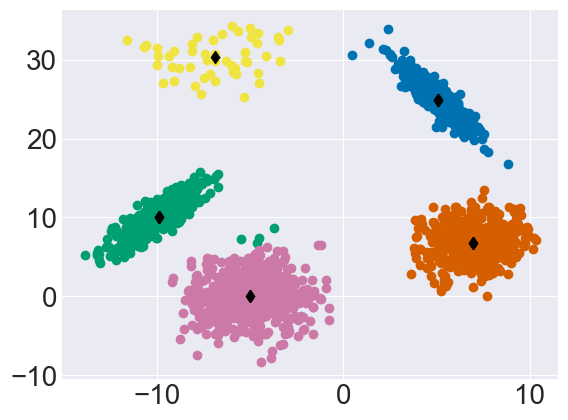

In [19]:
np.random.seed(0)
np.random.seed(0)
cluster = kmeans.KMeans(five_blobs)
cluster.cluster(k=5, init_method='kmeans++')
cluster.plot_clusters()

**Question 6:** Did the clustering get better compared to the non-batch clustering result from Task 1c? **Why?**

**Answer 6:**  It got much better. Now that we have an intelligent way of choosing the initial centroids, we can expect the k-means algorithm to arrive at a more optimal clustering at the end. By not placing centroids close to each other, we make sure that 2 centroids don't share the same cluster even from the beginning, and this lets other clusters that are distinct to be distinguished.

#### Compare number of iterations needed for K-means to converge

- Add support for the `init_method` optional parameter in `cluster_batch`.
- Add a return value to `cluster_batch`: the mean number of iterations required for each K-means instance to converge.
- Below, print out the mean number of iterations required for `random` and `kmeans++` initialization methods with the `five_blobs` dataset.

In [20]:
np.random.seed(0)
np.random.seed(0)
cluster = kmeans.KMeans(five_blobs)
iter1 = cluster.cluster_batch(k=5, n_iter=10, init_method='kmeans++')
iter2 = cluster.cluster_batch(k=5, n_iter=10, init_method='random')
print("Average number of iterations for kmeans++ initialization: ", iter1)
print("Average number of iterations for random initialization: ", iter2)


Average number of iterations for kmeans++ initialization:  5.7
Average number of iterations for random initialization:  9.6


**Question 7:** Which initialization method is better with respect to number of iterations required to converge?

**Answer 7:** kmeans++ initialization results in lower number of iterations. This means it converges faster and therefore is better.

## Task 3: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 3a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [21]:
from matplotlib.image import imread

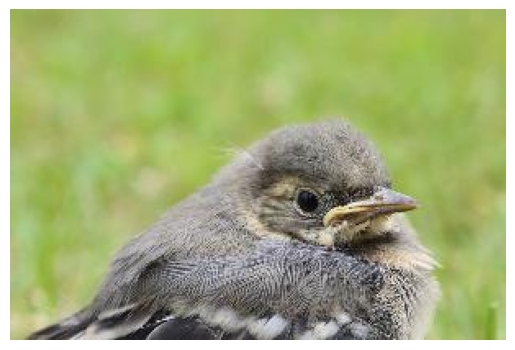

In [22]:
babyBird = plt.imread('data/baby_bird.jpg')
plt.imshow(babyBird)
plt.axis('off')
plt.show()

### 3b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [23]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    num_rows = img.shape[0]
    num_cols = img.shape[1]
    rgb = img.shape[2]
    flat = img.reshape(num_rows*num_cols, rgb)
    return flat

In [24]:
flat_babyBird = flatten(babyBird)
print(flat_babyBird.shape)

(61206, 3)


### 3c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [25]:
cluster_babyBird = kmeans.KMeans(flat_babyBird)
cluster_babyBird.cluster(3)
cluster_babyBird.replace_color_with_centroid()

### 3d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

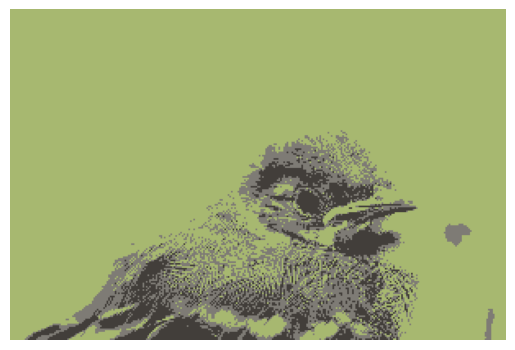

In [26]:
origDimImg = cluster_babyBird.data.reshape((babyBird.shape[0], babyBird.shape[1], babyBird.shape[2]))
origDimImg = origDimImg.astype(int)
plt.imshow(origDimImg)
plt.axis('off')
plt.show()

### 3e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

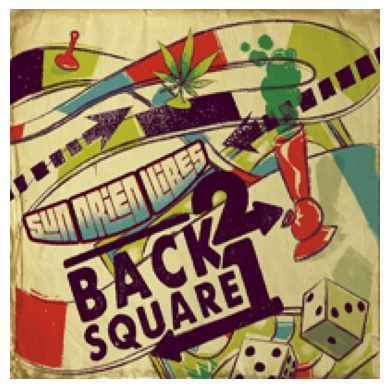

In [27]:
img = plt.imread('data/album_cover_small.jpeg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
flat_img = flatten(img)
cluster_img = kmeans.KMeans(flat_img)
cluster_img.cluster(k=5)
cluster_img.replace_color_with_centroid()

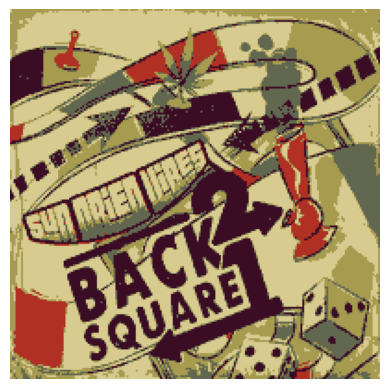

In [29]:
origDim_img = cluster_img.data.reshape((img.shape[0], img.shape[1], img.shape[2]))
origDim_img = origDim_img.astype(int)
plt.imshow(origDim_img)
plt.axis('off')
plt.show()

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

In [31]:
bankMarketing_data = pd.read_csv('data/bank.csv')
bankMarketing_data = bankMarketing_data.to_numpy()

# balance vs age
bankMarketing1 = bankMarketing_data[:, [0,3]]

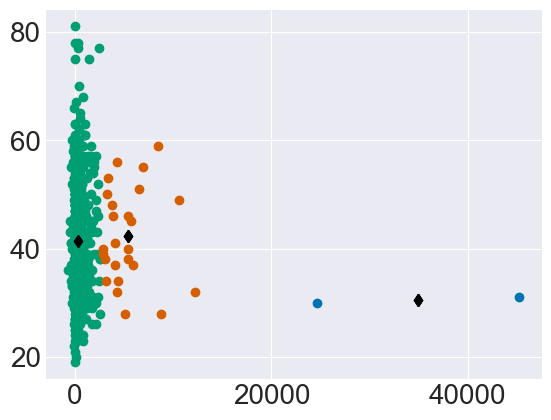

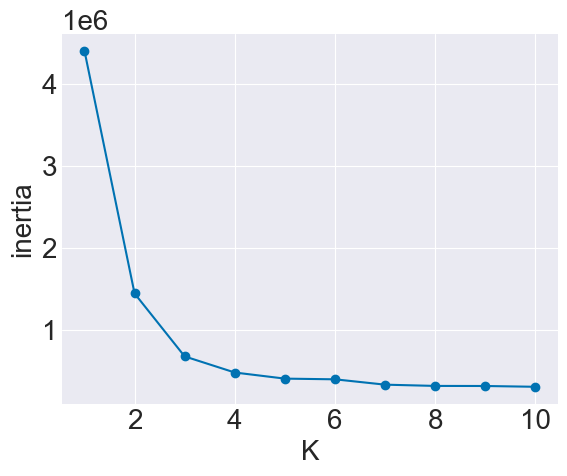

In [32]:
np.random.seed(21)

cluster_bank1 = kmeans.KMeans(bankMarketing1)

cluster_bank1.cluster(k=3)
cluster_bank1.plot_clusters()
plt.show()

cluster_bank1.elbow_plot(10)
plt.show()

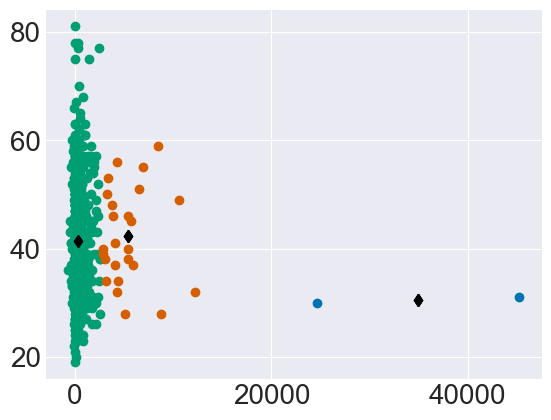

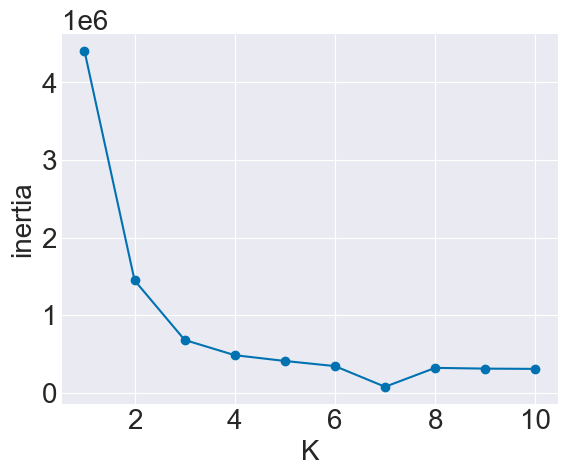

In [33]:
np.random.seed(22)

cluster_bank1.cluster_batch(k=3, n_iter=10)
cluster_bank1.plot_clusters()
plt.show()

cluster_bank1.elbow_plot(10, n_iter=10)
plt.show()

This is a data set exploring a bank's marketing efforts with variables like balance, duration, days, campaign of the clients they contacted during their call. For this extension, I explored the relationship between the contacted clients' bank balance and ages. As we can see from the intial cluster, we identified 3 possible clusters in the data. Grpahing the k values against inertia gave us a graph that did not consistently give us a lower value of inertia with every next k. Since the cluster batch method gives us more accuracy since we are running clustering multiple times, I decided to run it with n_iter = 10. This gave me relatively similar clustering looking at the graph visually. However, as we can see from the graph of k values against inertia, this gave us more of the shape that we would expect, inertia decreasing with an increase in the value of k. 

Looking at the graphs, I thought that k = 5 would be a good value to use since it reduces the inertia to a good amount after which even if we increase k there is no major difference in the values of inertia. Below is what the result came out to be after a cluster batch of n_iter = 10.

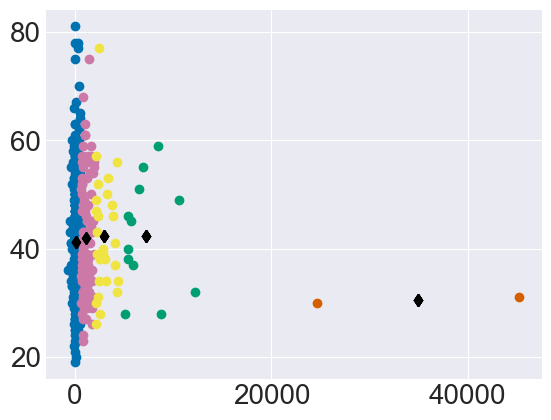

In [34]:
np.random.seed(23)

cluster_bank1.cluster_batch(k=5, n_iter=10)
cluster_bank1.plot_clusters()
plt.show()

### 3) Cluster additional datasets

I decided to repeat the procedure, this time looking at the same data set but different variable: namely bank balance and duration of the calls to various clients as part of the marketing campaign.

In [35]:
# balance vs duration
bankMarketing2 = bankMarketing_data[:, [0,2]]

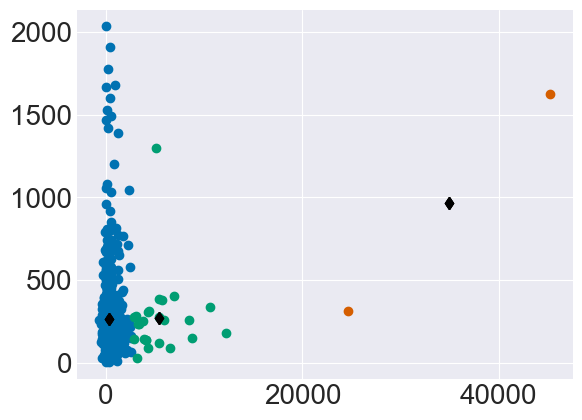

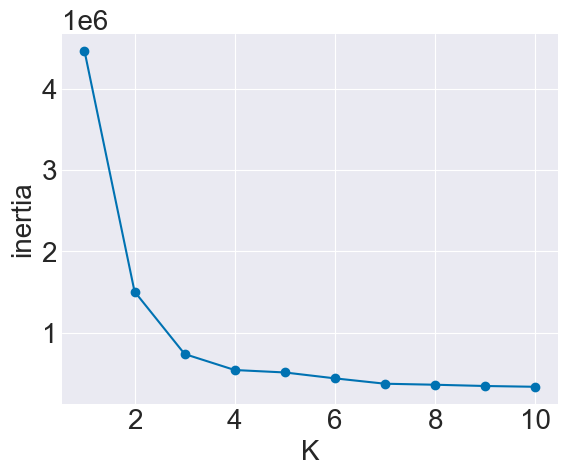

In [36]:
np.random.seed(24)

cluster_bank2 = kmeans.KMeans(bankMarketing2)

cluster_bank2.cluster_batch(k=3, n_iter=10)
cluster_bank2.plot_clusters()
plt.show()

cluster_bank2.elbow_plot(10, n_iter=10)
plt.show()

Again I think that from looking at the graph, k = 5 would be a good value to use because it reduces inertia to a point after which further reduction in k does not cause much reduction in k. The result of this was the following.

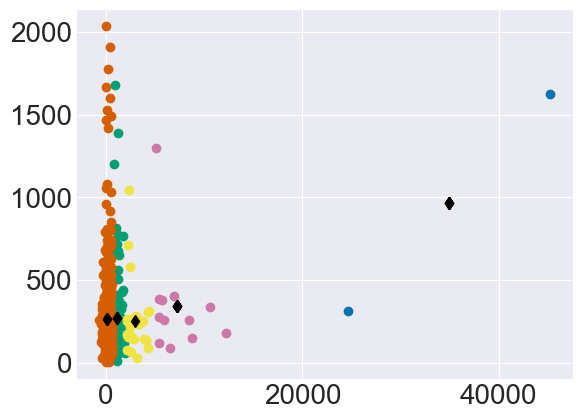

In [37]:
np.random.seed(25)

cluster_bank2.cluster_batch(k=5, n_iter=10)
cluster_bank2.plot_clusters()
plt.show()

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.